<h1>Определение перспективного тарифа для телеком компании<span 
class="tocSkip"></span></h1>

# План проекта: #

1. [Изучение данных из файлов](#cell1)
2. [Предобработка данных. Поиск и исправление ошибок](#cell2)
3. [Анализ данных](#cell3)
4. [Проверка гипотез](#cell4)
5. [Вывод](#cell5)

## Изучение данных из файлов
<a id='cell1'></a>

Импортируем различные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import copy

Прочитаем все приложенные файлы и сохраним их в переменные:

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

## Предобработка данных. Поиск и исправление ошибок
<a id='cell2'></a>

Выведем первые строки таблиц, выведем общую информацию о таблицах, проверим данные на наличие пропусков, исправим типы данных в столбцах, добавим необходимые столбцы в таблицы, исправим некорректные данные в таблицах:

**Таблица calls**

In [3]:
# Получение первых строк таблицы:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# Общая информация о данных таблицы:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# Исправим типы данных в столбце 'call_date' на тип - 'date':
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [6]:
#создадим столбец с названием месяца
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

def month_name(row):
    month = row['month']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

calls['m_name'] = calls.apply(month_name, axis = 1)

**Таблица internet**

In [7]:
# Получение первых строк таблицы:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
# Общая информация о данных таблицы:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
# Исправим типы данных в столбце 'session_date' на тип - 'date':
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [10]:
# Создадим столбец с названием месяца
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

def month_name(row):
    month = row['month']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

internet['m_name'] = internet.apply(month_name, axis = 1)

**Таблица messages**

In [11]:
# Получение первых строк таблицы.
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
# Общая информация о данных таблицы.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
# Исправим типы данных в столбце 'message_date' на тип - 'date':
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [14]:
#создадим столбец с названием месяца
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

def month_name(row):
    month = row['month']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

messages['m_name'] = messages.apply(month_name, axis = 1)

**Таблица users**

In [15]:
# Получение первых строк таблицы.
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
# Общая информация о данных таблицы.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# Исправим типы данных в столбце 'reg_date' на тип - 'date':
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [18]:
# Исправим пропуски в столбце 'churn_date', если есть пропуск, значит клиент попрежнему пользуется услугами:
users['churn_date'].fillna('2021-07-01', inplace=True) 

In [19]:
# Исправим типы данных в столбце 'churn_date' на тип - 'date':
users['churn_date'] = pd.to_datetime(users['churn_date'])

**Таблица tariffs**

In [20]:
# Получение первых строк таблицы.
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Рассмотрим полученную информацию подробнее.**

**Таблица users (информация о пользователях):**

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В таблице calls('duration') присутствуют нулевые значения. Проверим, сколько их.

In [21]:
calls.query('duration == 0')

,id,call_date,duration,user_id,month,m_name
0,1000_0,2018-07-25,0.0,1000,7,июль
1,1000_1,2018-08-17,0.0,1000,8,август
5,1000_5,2018-11-02,0.0,1000,11,ноябрь
6,1000_6,2018-10-18,0.0,1000,10,октябрь
9,1000_9,2018-08-15,0.0,1000,8,август
...,...,...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499,12,декабрь
202592,1499_205,2018-10-13,0.0,1499,10,октябрь
202593,1499_206,2018-12-26,0.0,1499,12,декабрь
202594,1499_207,2018-10-28,0.0,1499,10,октябрь


Получаем почти 40 тысяч значений, где длительность звонка равна 0. Звонок нулевой длины, это по факту состоявшееся соединение, которое тут же прервалось. Платят за него, как за одну минуту разговора, поэтому округлим все значения наверх.

In [22]:
def call_ceil(value):
    return math.ceil(value)
calls['duration'] = calls['duration'].apply(call_ceil) 

In [23]:
# Исправим типы данных в столбце 'duration' на тип - 'int':
calls['duration'] = calls['duration'].astype('int')

In [24]:
# Исправим данные в таблице calls('duration') с 0 на 1:
calls.loc[calls['duration'] == 0, 'duration'] = 1

В таблице df_internet('mb_used') присутствуют нулевые значения. Проверим, сколько их.

In [25]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id,month,m_name
11,11,1000_11,0.0,2018-08-28,1000,8,август
38,38,1000_38,0.0,2018-11-27,1000,11,ноябрь
46,46,1000_46,0.0,2018-06-30,1000,6,июнь
67,67,1000_67,0.0,2018-06-16,1000,6,июнь
72,72,1000_72,0.0,2018-06-15,1000,6,июнь
...,...,...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499,12,декабрь
149381,149381,1499_142,0.0,2018-11-01,1499,11,ноябрь
149383,149383,1499_144,0.0,2018-11-27,1499,11,ноябрь
149386,149386,1499_147,0.0,2018-10-21,1499,10,октябрь


Получаем почти 20 тысяч значений, где количество интернет-трафика равно 0. Так как факт соединения присутствует, округлим значение до 1 мб.

In [26]:
# Исправим данные в таблице internet('mb_used') с 0 на 1:
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

## Анализ данных
<a id='cell3'></a>

Сгрупируем данные по звонкам, интернету и сообщениям:

In [27]:
calls_group = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_group.reset_index()
calls_group.columns = ['calls_duration', 'calls_amount']

internet_group = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet_group.columns = ['mb_used']
internet_group.reset_index()
 
messages_group = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_group.reset_index()
messages_group.columns=['messages_amount']

Объединим данные о звонках, интернете и сообщениях:

In [28]:
calls_internet = calls_group.merge(internet_group, on=['user_id', 'month'], how='outer')
all_data = calls_internet.merge(messages_group, on=['user_id', 'month'], how='outer')

Заполним пустоты значением - ноль:

In [29]:
all_data.isnull().sum()

calls_duration      40
calls_amount        40
mb_used             11
messages_amount    497
dtype: int64

In [30]:
all_data['calls_duration'].fillna(0, inplace=True)
all_data['calls_amount'].fillna(0, inplace=True)
all_data['mb_used'].fillna(0, inplace=True)
all_data['messages_amount'].fillna(0, inplace=True)

Создадим общую таблицу:

In [31]:
all_data_pvt = all_data.pivot_table(index=['user_id', 'month'])
all_data_pvt = all_data_pvt.reset_index()

In [32]:
total_data = all_data_pvt.merge(users, on='user_id', how='right').pivot_table(index=['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'month'])
total_data = total_data.reset_index()

In [33]:
# Округлим кол-во мегабайт
total_data['mb_used'] = total_data['mb_used'].apply(np.ceil)

In [34]:
# Переведем мб в гб
total_data['gb_used'] = (total_data['mb_used'] / 1024)

In [35]:
# Округлим кол-во гигабайт
total_data['gb_used'] = np.ceil(total_data['gb_used'])

In [36]:
# Создадим копию таблицы
total_data2 = total_data.copy()

Подсчёт стоимости:

In [37]:
df_tariffs = tariffs.set_index('tariff_name') # Чтобы получить доступ по имени тарифа.


def func(df):
    
    # Записали абонентскую плату. 
    revenue = df_tariffs.loc[df.tariff]['rub_monthly_fee']
    
    revenue += (max(0, (df['calls_duration'] - df_tariffs.loc[df.tariff]['minutes_included']) * df_tariffs.loc[df.tariff]['rub_per_minute'])
    + max(0, (df['messages_amount'] - df_tariffs.loc[df.tariff]['messages_included']) * df_tariffs.loc[df.tariff]['rub_per_message'])
    + max(0, np.ceil((df['mb_used'] - df_tariffs.loc[df.tariff]['mb_per_month_included'])/1024) * df_tariffs.loc[df.tariff]['rub_per_gb']))
    
    return revenue
    
total_data2['revenue'] = total_data2.apply(func, axis=1)  

total_data2.head()

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,month,calls_amount,calls_duration,mb_used,messages_amount,gb_used,revenue
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2021-07-01,5.0,22.0,164.0,2255.0,22.0,3.0,1950.0
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2021-07-01,6.0,43.0,187.0,23239.0,60.0,23.0,1950.0
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2021-07-01,7.0,47.0,346.0,14005.0,75.0,14.0,1950.0
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2021-07-01,8.0,52.0,418.0,14058.0,81.0,14.0,1950.0
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2021-07-01,9.0,58.0,478.0,14571.0,57.0,15.0,1950.0


**Тариф Smart:**

In [39]:
smart_data = total_data2.query('tariff == "smart"')
smart_data[['calls_duration', 'gb_used', 'messages_amount', 'revenue']].describe()

,calls_duration,gb_used,messages_amount,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,429.450875,16.340960,33.384029,1308.564379
std,194.871174,5.748424,28.227876,828.209621
min,0.000000,0.000000,0.000000,550.000000
25%,291.000000,13.000000,10.000000,553.000000
50%,435.000000,17.000000,28.000000,1072.000000
75%,560.000000,20.000000,51.000000,1750.000000
max,1471.000000,38.000000,143.000000,6824.000000


In [40]:
print('Среднее кол-во использованных минут в месяц по тарифу Smart:', math.ceil(smart_data['calls_duration'].mean()))
print('Медианнее кол-во использованных минут в месяц по тарифу Smart:', math.ceil(smart_data['calls_duration'].median()))
print('Среднее кол-во использованного трафика в месяц по тарифу Smart:', math.ceil(smart_data['gb_used'].mean()))
print('Медианное кол-во использованного трафика в месяц по тарифу Smart:', math.ceil(smart_data['gb_used'].median()))
print('Среднее кол-во сообщений в месяц по тарифу Smart:', math.ceil(smart_data['messages_amount'].mean()))
print('Медианное кол-во сообщений в месяц по тарифу Smart:', math.ceil(smart_data['messages_amount'].median()))
print('Средняя стоимость в месяц по тарифу Smart:', math.ceil(smart_data['revenue'].mean()))
print('Медианная стоимость в месяц по тарифу Smart:', math.ceil(smart_data['revenue'].median()))

Среднее кол-во использованных минут в месяц по тарифу Smart: 430
Медианнее кол-во использованных минут в месяц по тарифу Smart: 435
Среднее кол-во использованного трафика в месяц по тарифу Smart: 17
Медианное кол-во использованного трафика в месяц по тарифу Smart: 17
Среднее кол-во сообщений в месяц по тарифу Smart: 34
Медианное кол-во сообщений в месяц по тарифу Smart: 28
Средняя стоимость в месяц по тарифу Smart: 1309
Медианная стоимость в месяц по тарифу Smart: 1072


Дисперсия и мат.ожидание для тарифа Smart:

In [41]:
# Дисперсия итоговой стоимости
variance_smart = np.var(smart_data[['revenue']])
print(variance_smart)
# Мат.ожидание
expectation_smart = variance_smart**0.5
print(expectation_smart)

revenue    685623.445496
dtype: float64
revenue    828.023819
dtype: float64


In [42]:
# Дисперсия по минутам
variance_smart = np.var(smart_data[['calls_duration']])
print('Дисперсия по минутам:', variance_smart)
# Дисперсия по гб
variance_smart = np.var(smart_data[['gb_used']])
print('Дисперсия по гб:', variance_smart)
# Дисперсия по сообщениям
variance_smart = np.var(smart_data[['messages_amount']])
print('Дисперсия по сообщениям:', variance_smart)

Дисперсия по минутам: calls_duration    37957.737941
dtype: float64
Дисперсия по гб: gb_used    33.029552
dtype: float64
Дисперсия по сообщениям: messages_amount    796.455483
dtype: float64


**Тариф Smart**

- Среднее кол-во использованных минут в месяц по тарифу Smart: 430 минут.
- Среднее кол-во использованного трафика в месяц по тарифу Smart: 17 гб.
- Среднее кол-во сообщений в месяц по тарифу Smart: 34 шт.
- Средняя стоимость в месяц по тарифу Smart: 1309 руб.

Тариф Smart более популярный тариф, чем Ultra. Пользователям часто не хватает предоставленных лимитов и поэтому приходится доплачивать, сверх стоимости тарифа.

**Тариф Ultra:**

In [43]:
ultra_data = total_data2.query('tariff == "ultra"')
ultra_data[['calls_duration', 'gb_used', 'messages_amount', 'revenue']].describe()

,calls_duration,gb_used,messages_amount,revenue
count,985.000000,985.000000,985.000000,985.000000
mean,540.779695,19.499492,49.363452,2070.304569
std,325.738740,9.855266,47.804457,376.715465
min,0.000000,0.000000,0.000000,1950.000000
25%,292.000000,12.000000,6.000000,1950.000000
50%,532.000000,19.000000,38.000000,1950.000000
75%,773.000000,27.000000,79.000000,1950.000000
max,1727.000000,49.000000,224.000000,4800.000000


In [44]:
print('Среднее кол-во использованных минут в месяц по тарифу Ultra:', math.ceil(ultra_data['calls_duration'].mean()))
print('Медианное кол-во использованных минут в месяц по тарифу Ultra:', math.ceil(ultra_data['calls_duration'].median()))
print('Среднее кол-во использованного трафика в месяц по тарифу Ultra:', math.ceil(ultra_data['gb_used'].mean()))
print('Медианное кол-во использованного трафика в месяц по тарифу Ultra:', math.ceil(ultra_data['gb_used'].median()))
print('Среднее кол-во сообщений в месяц по тарифу Ultra:', math.ceil(ultra_data['messages_amount'].mean()))
print('Медианное кол-во сообщений в месяц по тарифу Ultra:', math.ceil(ultra_data['messages_amount'].median()))
print('Средняя стоимость в месяц по тарифу Ultra:', math.ceil(ultra_data['revenue'].mean()))
print('Медианная стоимость в месяц по тарифу Ultra:', math.ceil(ultra_data['revenue'].median()))

Среднее кол-во использованных минут в месяц по тарифу Ultra: 541
Медианное кол-во использованных минут в месяц по тарифу Ultra: 532
Среднее кол-во использованного трафика в месяц по тарифу Ultra: 20
Медианное кол-во использованного трафика в месяц по тарифу Ultra: 19
Среднее кол-во сообщений в месяц по тарифу Ultra: 50
Медианное кол-во сообщений в месяц по тарифу Ultra: 38
Средняя стоимость в месяц по тарифу Ultra: 2071
Медианная стоимость в месяц по тарифу Ultra: 1950


In [45]:
# Дисперсия итоговой стоимости
variance_ultra = np.var(ultra_data[['revenue']])
print('Дисперсия итоговой стоимости', variance_ultra)
# Мат.ожидание
expectation_ultra = variance_ultra**0.5
print(expectation_ultra)

Дисперсия итоговой стоимости revenue    141770.465614
dtype: float64
revenue    376.52419
dtype: float64


In [46]:
# Дисперсия по минутам
variance_smart = np.var(ultra_data[['calls_duration']])
print('Дисперсия по минутам:', variance_smart)
# Дисперсия по гб
variance_smart = np.var(ultra_data[['gb_used']])
print('Дисперсия по гб:', variance_smart)
# Дисперсия по сообщениям
variance_smart = np.var(ultra_data[['messages_amount']])
print('Дисперсия по сообщениям:', variance_smart)

Дисперсия по минутам: calls_duration    105998.005273
dtype: float64
Дисперсия по гб: gb_used    97.027665
dtype: float64
Дисперсия по сообщениям: messages_amount    2282.946075
dtype: float64


**Тариф Ultra**

- Среднее кол-во использованных минут в месяц по тарифу Ultra: 541 минут.
- Среднее кол-во использованного трафика в месяц по тарифу Ultra: 20 гб.
- Среднее кол-во сообщений в месяц по тарифу Ultra: 50 шт.
- Средняя стоимость в месяц по тарифу Ultra: 2071 руб.

В тарифе Ultra, пользователи почти не выходят за предоставленные им лимиты, и в большинстве случаев стоимость в месяц не превышает стоимость тарифного плана.

Построим диаграммы размаха для каждого тарифа:

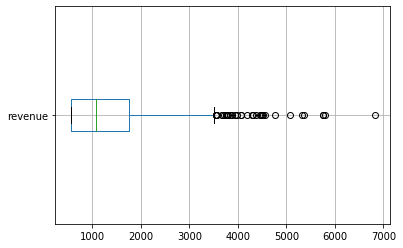

In [47]:
# Диаграммы размаха для тарифа Smart
smart_data[['revenue']].boxplot(vert=False)

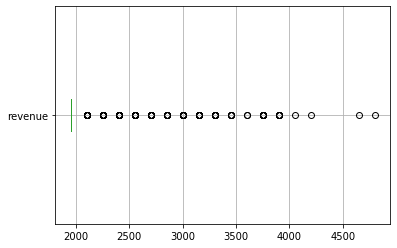

In [48]:
# Диаграммы размаха для тарифа Ultra
ultra_data[['revenue']].boxplot(vert=False)

В тарифе Smart нормальные значения для тарифа smart от 550 руб до 1550 руб, при стоимости тарифа 550 руб. 
Для тарифа Ultra нормальное значение - цена тарифа, 1950р.

Построим гистограммы сравнений тарифов по звонкам, интернету, сообщениям и стоимости:

Text(0, 0.5, 'Частота')

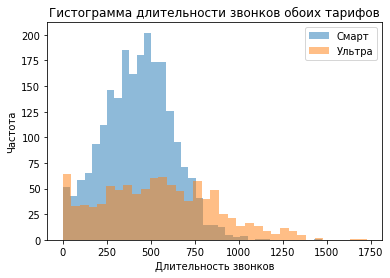

In [49]:
# Использованные минуты тарифов Smart(оранжевый цвет) и Ultra(синий цвет)
total_data2.groupby('tariff')['calls_duration'].plot.hist(alpha=0.5, legend=True, bins=35)
plt.title('Гистограмма длительности звонков обоих тарифов')
plt.xlabel('Длительность звонков')
plt.legend(['Смарт', 'Ультра'])
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

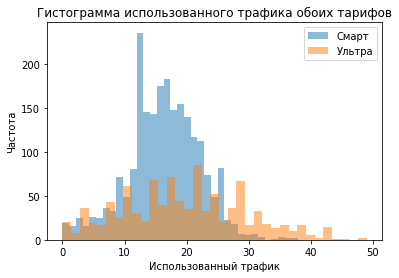

In [50]:
# Использованные гб тарифов Smart(оранжевый цвет) и Ultra(синий цвет)
total_data2.groupby('tariff')['gb_used'].plot.hist(alpha=0.5, legend=True, bins=35)
plt.title('Гистограмма использованного трафика обоих тарифов')
plt.xlabel('Использованный трафик')
plt.legend(['Смарт', 'Ультра'])
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

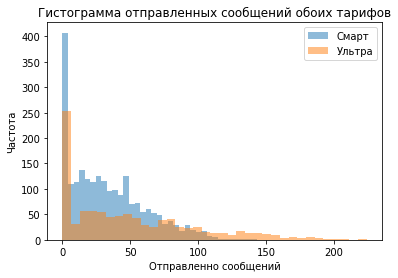

In [51]:
# Использованные сообщения тарифов Smart(оранжевый цвет) и Ultra(синий цвет)
total_data2.groupby('tariff')['messages_amount'].plot.hist(alpha=0.5, legend=True, bins=35)
plt.title('Гистограмма отправленных сообщений обоих тарифов')
plt.xlabel('Отправленно сообщений')
plt.legend(['Смарт', 'Ультра'])
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

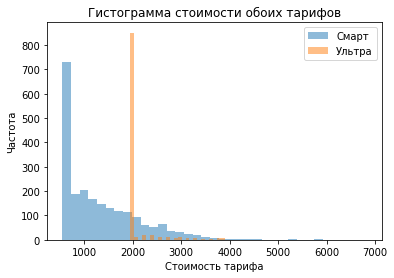

In [52]:
# Стоимость тарифов Smart(оранжевый цвет) и Ultra(синий цвет)
total_data2.groupby('tariff')['revenue'].plot.hist(alpha=0.5, legend=True, bins=35)
plt.title('Гистограмма стоимости обоих тарифов')
plt.xlabel('Стоимость тарифа')
plt.legend(['Смарт', 'Ультра'])
plt.ylabel('Частота') 

На гистограммах видно, что тафиф Smart пользуется большей популярностью, чем Ultra.
В среднем по тарифу Ultra люди используют больше минут, гб и сообщений.
В тарифе Ultra в основном люди платят только абонентскую плату, в тарифе Smart много дополнительных услуг, которые оплачиваются отдельно.

In [53]:
total_data2.pivot_table(index='tariff', values=['calls_duration', 'mb_used', 'messages_amount'],
                       aggfunc = ['mean', 'std', 'var'])

mean                                          std  \
       calls_duration       mb_used messages_amount calls_duration   
tariff                                                               
smart      429.450875  16216.869448       33.384029     194.871174   
ultra      540.779695  19471.110660       49.363452     325.738740   

                                                var                \
             mb_used messages_amount calls_duration       mb_used   
tariff                                                              
smart    5872.700347       28.227876   37974.774628  3.448861e+07   
ultra   10087.988051       47.804457  106105.726823  1.017675e+08   

                        
       messages_amount  
tariff                  
smart       796.812958  
ultra      2285.266143

## Проверка гипотез
<a id='cell4'></a>

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
- Нулевая гипотеза - средние наших выборок равны. 
- Альтернативная гипотеза - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".
- Метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются.
- Критический уровень значимости - 0.05.

In [54]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(smart_data['revenue'], ultra_data['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 6.992771952453896e-237
Отвергаем нулевую гипотезу


2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

- Нулевая гипотеза - средние наших выборок равны.
- Альтернативная гипотеза - "Средняя выручка пользователей из Москвы и из других регионов различается".
- Метод scipy.stats.ttest_ind (array1, array2, equal_var = False).
- Критический уровень значимости - 0.05.

In [55]:
moscow = total_data2[total_data2['city'] == 'Москва']
other = total_data2[total_data2['city'] != 'Москва']

In [56]:
alpha = 0.05
results = st.ttest_ind(moscow['revenue'], other['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.549717455143522
Не получилось отвергнуть нулевую гипотезу


**Вывод**

P-value равно 0.54, а значит есть вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средних значений.

Альтернативную гипотезу о различии средних мы отвергаем.

## Вывод
<a id='cell5'></a>

- Среднемесячная прибыль тарифа Ultra выше прибыли тарифа Smart.
- Тариф Smart пользуется большей популярностью.

Среднемесячная прибыль по тарифу Ultra выше. Но совокупная выше у Smart за счет большего числа клиентов. В тарифе Ultra практически никто не выходит за рамки тарифа, в тарифе Smart при стоимости 550р в месяц, основные показатели от 550 руб. до 1550 руб. Для тарифа Ultra нормальное значение - 1950 руб.(цена тарифа).